In [1]:
pip install pandas numpy matplotlib scikit-learn


<ipython-input-2-eea39dd8db02>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['date'] = pd.to_datetime(country_data['date'])


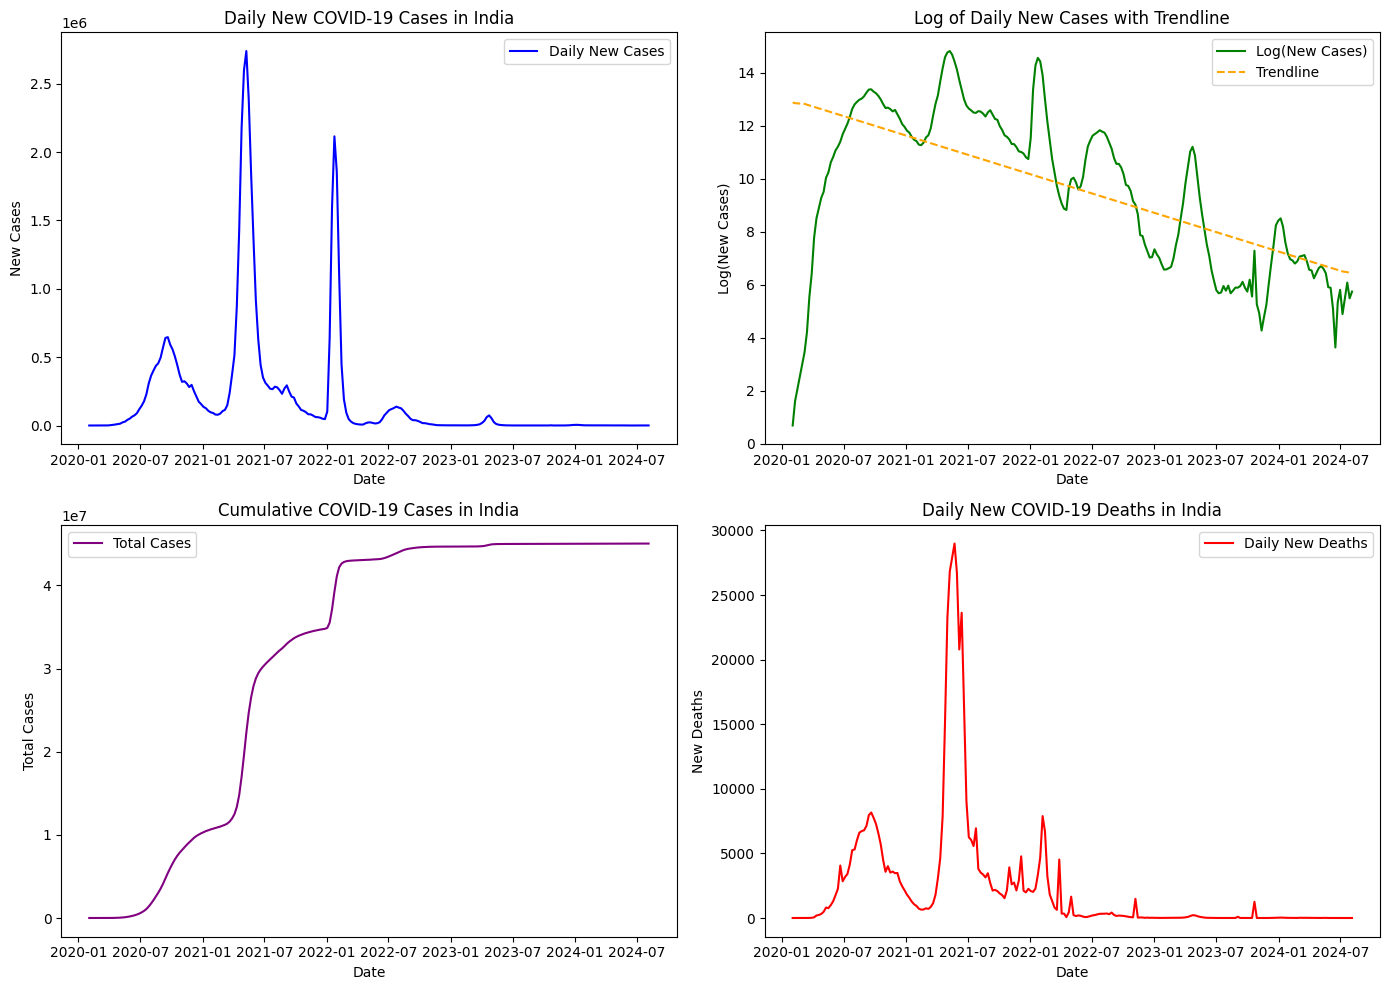

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from datetime import datetime

# Load the data
current_data = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')

# Filter the data for a specific country and date range
country_data = current_data[current_data['location'] == 'India']
country_data['date'] = pd.to_datetime(country_data['date'])
country_data = country_data[country_data['date'] >= '2020-01-01']

# Process data for modeling
country_data['new_cases'] = country_data['new_cases'].replace(0, np.nan)
country_data['log_new_cases'] = np.log(country_data['new_cases'])
country_data.dropna(subset=['log_new_cases'], inplace=True)

# Prepare data for linear regression
dates = np.arange(len(country_data)).reshape(-1, 1)
log_cases = country_data['log_new_cases'].values.reshape(-1, 1)

# Train a linear regression model
model = LinearRegression().fit(dates, log_cases)
trendline = model.predict(dates)

# Define subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# First graph - Daily new cases
axs[0, 0].plot(country_data['date'], country_data['new_cases'], label='Daily New Cases', color='blue')
axs[0, 0].set_title('Daily New COVID-19 Cases in India')
axs[0, 0].set_xlabel('Date')
axs[0, 0].set_ylabel('New Cases')
axs[0, 0].legend()

# Second graph - Log of daily new cases with trendline
axs[0, 1].plot(country_data['date'], country_data['log_new_cases'], label='Log(New Cases)', color='green')
axs[0, 1].plot(country_data['date'], trendline, label='Trendline', linestyle='--', color='orange')
axs[0, 1].set_title('Log of Daily New Cases with Trendline')
axs[0, 1].set_xlabel('Date')
axs[0, 1].set_ylabel('Log(New Cases)')
axs[0, 1].legend()

# Third graph - Cumulative cases
axs[1, 0].plot(country_data['date'], country_data['total_cases'], label='Total Cases', color='purple')
axs[1, 0].set_title('Cumulative COVID-19 Cases in India')
axs[1, 0].set_xlabel('Date')
axs[1, 0].set_ylabel('Total Cases')
axs[1, 0].legend()

# Fourth graph - Daily new deaths
axs[1, 1].plot(country_data['date'], country_data['new_deaths'], label='Daily New Deaths', color='red')
axs[1, 1].set_title('Daily New COVID-19 Deaths in India')
axs[1, 1].set_xlabel('Date')
axs[1, 1].set_ylabel('New Deaths')
axs[1, 1].legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()
